In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/aadarsh/Desktop/Detecting-Financial-Fraud-via-NLP-in-Transactions-and-Loan-Applications/data/TeleAntiFraud/cleaned_conversations.csv')

df.head()

,conversation_id,label,left_text,right_text,full_text,fraud_type,perp_text_en
0,tts_test1,NEG,喂，你好 我是来自金融投资咨询中心的小李，我们注意到你最近在寻找投资机会。 太好了，我们有一...,嗯，你好 哦，是吗，我确实有点兴趣。 嗯，听起来不错，具体是什么项目呢？ 数字货币啊，听起来...,喂，你好 嗯，你好 我是来自金融投资咨询中心的小李，我们注意到你最近在寻找投资机会。 哦，是...,Investment Scam,"Hello, hello, I am Xiao Li from the Financial ..."
1,tts_test10,NEG,喂，你好，我是中行渠道部的小李。 我们这边有一个特别优惠的贷款产品，利率特别低，只有两厘，你...,你好，有什么事情吗？ 可以啊，这个贷款怎么申请？ 下载APP？我怕下载了以后有问题。 那我需...,喂，你好，我是中行渠道部的小李。 你好，有什么事情吗？ 我们这边有一个特别优惠的贷款产品，利...,Loan Scam,"Hello, hello, I’m Xiao Li from the Channel Dep..."
2,tts_test100,NEG,喂，你好，这边是全国快递客服专线，我是客服专员小李。 你的一个快递包裹在运输途中不慎丢失，我...,你好，有什么事吗？ 真的吗？那太感谢你了。 好的，我的银行卡号是六二二八四八零零零零零零零零...,喂，你好，这边是全国快递客服专线，我是客服专员小李。 你好，有什么事吗？ 你的一个快递包裹在...,Telecom Scam,"Hello, hello, this is the national express cus..."
3,tts_test1000,NEG,喂，你好，我是农商银行的张经理。 根据你名下的华瑞精密模具厂的营业执照，我们银行可以为你提供...,你好，张经理。 啊，这个暂时不需要。 嗯，我再考虑考虑。 嗯，好的。 好的，我知道了。,喂，你好，我是农商银行的张经理。 你好，张经理。 根据你名下的华瑞精密模具厂的营业执照，我们...,Loan Scam,"Hello, hello, I am Manager Zhang from Rural Co..."
4,tts_test1001,NEG,你好，请问是张华吗？ 我是京东金融的客服专员，我们注意到你之前有浏览过我们的贷款产品，现在我...,是我，你是谁啊？ 贷款？我现在手头还行，暂时不考虑。 那听起来不错，但我在其他银行也有贷款，...,你好，请问是张华吗？ 是我，你是谁啊？ 我是京东金融的客服专员，我们注意到你之前有浏览过我们...,Loan Scam,"Hello, is this Zhang Hua? I am a customer serv..."


In [4]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Clean and preprocess text data
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

def tokenize_and_process(text):
    """
    Tokenize text, remove stopwords, and apply stemming
    """
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and apply stemming
    processed_tokens = [
        stemmer.stem(token) for token in tokens 
        if token not in stop_words and len(token) > 2
    ]
    
    return processed_tokens

# Apply text preprocessing to the 'text' column
print("Cleaning text...")
df['cleaned_text'] = df['perp_text_en'].apply(clean_text)

print("Tokenizing and processing...")
df['tokenized_text'] = df['cleaned_text'].apply(tokenize_and_process)

# Create a processed text column (tokens joined back into strings)
df['processed_text'] = df['tokenized_text'].apply(lambda x: ' '.join(x))

print("Text preprocessing completed!")
print(f"\nOriginal text sample:")
print(df['perp_text_en'].iloc[0][:200] + "...")
print(f"\nCleaned text sample:")
print(df['cleaned_text'].iloc[0][:200] + "...")
print(f"\nTokenized text sample (first 20 tokens):")
print(df['tokenized_text'].iloc[0][:20])
print(f"\nProcessed text sample:")
print(df['processed_text'].iloc[0][:200] + "...")

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


Cleaning text...
Tokenizing and processing...
Text preprocessing completed!

Original text sample:
Hello, hello, I am Xiao Li from the Financial Investment Consulting Center. We noticed that you are looking for investment opportunities recently. Great, we have an investment project that is particul...

Cleaned text sample:
hello hello i am xiao li from the financial investment consulting center we noticed that you are looking for investment opportunities recently great we have an investment project that is particularly ...

Tokenized text sample (first 20 tokens):
['hello', 'hello', 'xiao', 'financi', 'invest', 'consult', 'center', 'notic', 'look', 'invest', 'opportun', 'recent', 'great', 'invest', 'project', 'particularli', 'suitabl', 'impress', 'return', 'low']

Processed text sample:
hello hello xiao financi invest consult center notic look invest opportun recent great invest project particularli suitabl impress return low risk new type digit currenc invest project profession team..

In [6]:
# Display statistics about the preprocessed text
print("Text Preprocessing Statistics:")
print("=" * 40)

# Original text statistics
original_lengths = df['perp_text_en'].str.len()
print(f"Original text - Average length: {original_lengths.mean():.1f} characters")
print(f"Original text - Max length: {original_lengths.max()} characters")
print(f"Original text - Min length: {original_lengths.min()} characters")

# Processed text statistics
processed_lengths = df['processed_text'].str.len()
print(f"\nProcessed text - Average length: {processed_lengths.mean():.1f} characters")
print(f"Processed text - Max length: {processed_lengths.max()} characters")
print(f"Processed text - Min length: {processed_lengths.min()} characters")

# Token statistics
token_counts = df['tokenized_text'].apply(len)
print(f"\nTokens per document - Average: {token_counts.mean():.1f}")
print(f"Tokens per document - Max: {token_counts.max()}")
print(f"Tokens per document - Min: {token_counts.min()}")

# Vocabulary size
all_tokens = [token for tokens in df['tokenized_text'] for token in tokens]
unique_tokens = set(all_tokens)
print(f"\nVocabulary size: {len(unique_tokens)} unique tokens")
print(f"Total tokens: {len(all_tokens)}")

# Display the dataframe columns
print(f"\nDataframe shape: {df.shape}")
print(f"New columns added: {[col for col in df.columns if col not in ['id', 'perp_text_en', 'fraud_reported']]}")

# Show a sample of the processed data
print(f"\nSample processed data:")
df[['perp_text_en', 'processed_text', 'fraud_type']].head(2)

Text Preprocessing Statistics:
Original text - Average length: 568.7 characters
Original text - Max length: 1618 characters
Original text - Min length: 99 characters

Processed text - Average length: 306.0 characters
Processed text - Max length: 891 characters
Processed text - Min length: 39 characters

Tokens per document - Average: 49.3
Tokens per document - Max: 137
Tokens per document - Min: 8

Vocabulary size: 4574 unique tokens
Total tokens: 438797

Dataframe shape: (8902, 10)
New columns added: ['conversation_id', 'label', 'left_text', 'right_text', 'full_text', 'fraud_type', 'cleaned_text', 'tokenized_text', 'processed_text']

Sample processed data:


,perp_text_en,processed_text,fraud_type
0,"Hello, hello, I am Xiao Li from the Financial ...",hello hello xiao financi invest consult center...,Investment Scam
1,"Hello, hello, I’m Xiao Li from the Channel Dep...",hello hello xiao channel depart bank china spe...,Loan Scam


In [7]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("BAAI/bge-small-en-v1.5")

embeddings = model.encode(df['processed_text'].tolist(), convert_to_tensor=False)

df['bert_embeddings'] = [row for row in embeddings]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
df2 = df[['bert_embeddings', 'fraud_type']]

In [10]:
df2

,bert_embeddings,fraud_type
0,"[0.0026774548, -0.018003881, -0.039634667, -0....",Investment Scam
1,"[-0.024462586, -0.020442918, 0.0115489215, -0....",Loan Scam
2,"[-0.046224616, -0.037668157, 0.022804054, -0.0...",Telecom Scam
3,"[-0.012993088, 0.011586831, 0.029758302, 0.017...",Loan Scam
4,"[-0.03579643, 0.026547749, 0.015830344, -0.046...",Loan Scam
...,...,...
8897,"[-0.03931205, -0.09792112, 0.050152663, 0.0017...",NaN
8898,"[-0.030737575, -0.004390534, 0.01883151, -0.03...",NaN
8899,"[-0.035740018, -0.0074961265, 0.031187458, -0....",NaN
8900,"[-0.04565244, -0.016183523, 0.061135404, -0.03...",NaN


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare the features (BERT embeddings) and target (fraud_type)
print("Preparing data for training...")

# Convert BERT embeddings to numpy array
X = np.array(df2['bert_embeddings'].tolist())
print(f"Feature matrix shape: {X.shape}")

# Prepare target variable - encode fraud_type to numeric labels
le = LabelEncoder()
y = le.fit_transform(df2['fraud_type'].values)
print(f"Target variable shape: {y.shape}")
print(f"Label mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Check class distribution
fraud_type_counts = df2['fraud_type'].value_counts()
print(f"\nOriginal class distribution:")
print(fraud_type_counts)

# Check encoded class distribution
unique_vals, counts = np.unique(y, return_counts=True)
print(f"\nEncoded class distribution: {dict(zip(unique_vals, counts))}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensure balanced split
)

print(f"\nTrain set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set shape: X_test {X_test.shape}, y_test {y_test.shape}")

# Check class distribution in splits
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print(f"\nTrain set class distribution: {dict(zip(unique_train, counts_train))}")
print(f"Test set class distribution: {dict(zip(unique_test, counts_test))}")

Preparing data for training...
Feature matrix shape: (8902, 384)
Target variable shape: (8902,)
Label mapping: {'Impersonation Scam': np.int64(0), 'Investment Scam': np.int64(1), 'Loan Scam': np.int64(2), 'Lottery/Prize Scam': np.int64(3), 'Other Scam': np.int64(4), 'Telecom Scam': np.int64(5), nan: np.int64(6)}

Original class distribution:
fraud_type
Loan Scam             2124
Investment Scam        688
Telecom Scam           457
Impersonation Scam     209
Other Scam              16
Lottery/Prize Scam       4
Name: count, dtype: int64

Encoded class distribution: {np.int64(0): np.int64(209), np.int64(1): np.int64(688), np.int64(2): np.int64(2124), np.int64(3): np.int64(4), np.int64(4): np.int64(16), np.int64(5): np.int64(457), np.int64(6): np.int64(5404)}

Train set shape: X_train (7121, 384), y_train (7121,)
Test set shape: X_test (1781, 384), y_test (1781,)

Train set class distribution: {np.int64(0): np.int64(167), np.int64(1): np.int64(550), np.int64(2): np.int64(1699), np.int64(

In [17]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

print("Training XGBoost model for fraud type classification...")
start_time = time.time()

# Determine if this is binary or multiclass classification
n_classes = len(le.classes_)
print(f"Number of fraud types: {n_classes}")
print(f"Fraud types: {le.classes_}")

# Initialize XGBoost classifier
if n_classes == 2:
    # Binary classification
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8
    )
else:
    # Multiclass classification
    xgb_model = xgb.XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        random_state=42,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8
    )

# Train the model
xgb_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Make predictions on test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)

print(f"\nModel training completed!")
print(f"Test accuracy: {accuracy_score(y_test, y_pred):.4f}")

Training XGBoost model for fraud type classification...
Number of fraud types: 7
Fraud types: ['Impersonation Scam' 'Investment Scam' 'Loan Scam' 'Lottery/Prize Scam'
 'Other Scam' 'Telecom Scam' nan]
Training completed in 5.34 seconds

Model training completed!
Test accuracy: 0.9590
Training completed in 5.34 seconds

Model training completed!
Test accuracy: 0.9590


DETAILED EVALUATION RESULTS - FRAUD TYPE CLASSIFICATION
Valid fraud type names: ['Impersonation Scam', 'Investment Scam', 'Loan Scam', 'Lottery/Prize Scam', 'Other Scam', 'Telecom Scam']
Number of classes: 6

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.68        42
           1       0.99      0.81      0.89       138
           2       0.93      0.98      0.96       425
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.83      0.78      0.80        91
           6       0.98      1.00      0.99      1081

    accuracy                           0.96      1781
   macro avg       0.64      0.60      0.62      1781
weighted avg       0.96      0.96      0.96      1781


Confusion Matrix:
[[  27    0    0    0    0    9    6]
 [   0  112   24    0    0    2    0]
 [   0    0  417    0    0    4    4]
 [   0    0    0    0    0    0    1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


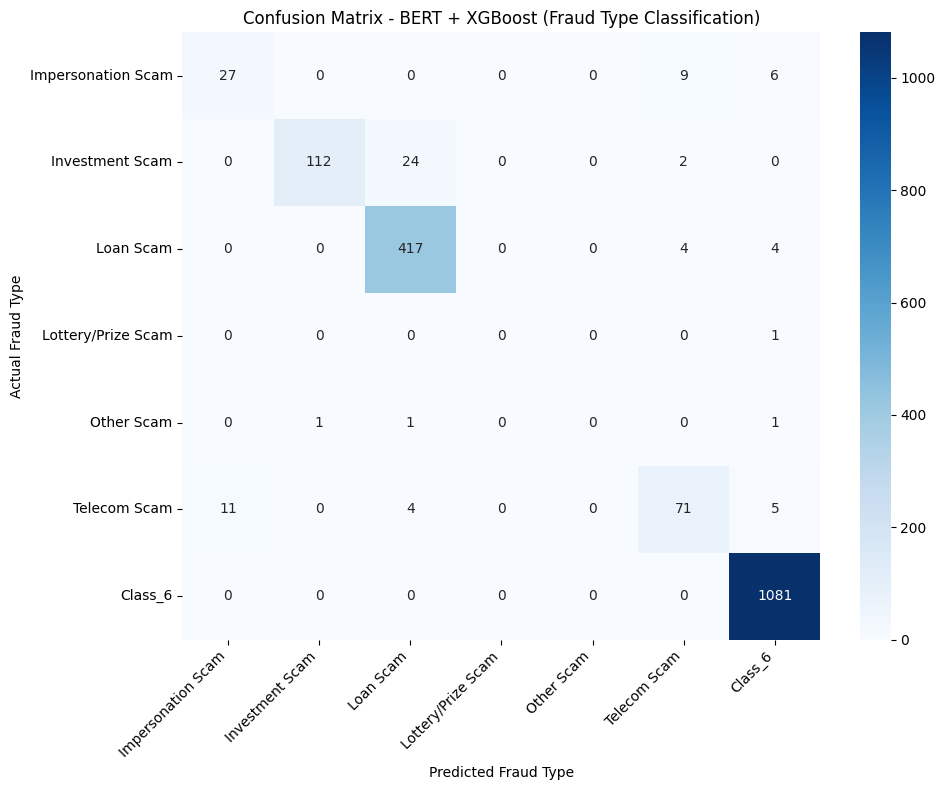


Per-Class Performance Summary:
Impersonation Scam - Precision: 0.711, Recall: 0.643, F1: 0.675
Investment Scam - Precision: 0.991, Recall: 0.812, F1: 0.892
Loan Scam       - Precision: 0.935, Recall: 0.981, F1: 0.958
Lottery/Prize Scam - Precision: 0.000, Recall: 0.000, F1: 0.000
Other Scam      - Precision: 0.000, Recall: 0.000, F1: 0.000
Telecom Scam    - Precision: 0.826, Recall: 0.780, F1: 0.802
Class_6         - Precision: 0.985, Recall: 1.000, F1: 0.992


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Detailed evaluation metrics
print("=" * 70)
print("DETAILED EVALUATION RESULTS - FRAUD TYPE CLASSIFICATION")
print("=" * 70)

# Get original fraud type names for better readability
# Filter out NaN values and convert to string for safety
fraud_type_names = [str(name) for name in le.classes_ if pd.notna(name)]
print(f"Valid fraud type names: {fraud_type_names}")
print(f"Number of classes: {len(fraud_type_names)}")

# Classification Report
print("\nClassification Report:")
if len(fraud_type_names) == len(le.classes_):
    print(classification_report(y_test, y_pred, target_names=fraud_type_names, zero_division=0))
else:
    print("Warning: Some fraud type names contain NaN values, using default labels")
    print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Overall metrics
accuracy = accuracy_score(y_test, y_pred)

if len(fraud_type_names) == 2:
    # Binary classification metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\nOverall Metrics:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
else:
    # Multiclass classification metrics
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\nOverall Metrics:")
    print(f"Accuracy:           {accuracy:.4f}")
    print(f"Precision (Macro):  {precision_macro:.4f}")
    print(f"Recall (Macro):     {recall_macro:.4f}")
    print(f"F1-Score (Macro):   {f1_macro:.4f}")
    print(f"Precision (Weighted): {precision_weighted:.4f}")
    print(f"Recall (Weighted):    {recall_weighted:.4f}")
    print(f"F1-Score (Weighted):  {f1_weighted:.4f}")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
# Use safe labels for confusion matrix
safe_labels = [f"Class_{i}" if pd.isna(name) else str(name) for i, name in enumerate(le.classes_)]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=safe_labels, 
            yticklabels=safe_labels)
plt.title('Confusion Matrix - BERT + XGBoost (Fraud Type Classification)')
plt.ylabel('Actual Fraud Type')
plt.xlabel('Predicted Fraud Type')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print per-class performance
print(f"\nPer-Class Performance Summary:")
for i, fraud_type in enumerate(le.classes_):
    # Handle NaN values safely
    safe_name = f"Class_{i}" if pd.isna(fraud_type) else str(fraud_type)
    
    # Check if this class appears in test set
    if i in y_test:
        try:
            class_precision = precision_score(y_test, y_pred, labels=[i], average=None, zero_division=0)[0]
            class_recall = recall_score(y_test, y_pred, labels=[i], average=None, zero_division=0)[0] 
            class_f1 = f1_score(y_test, y_pred, labels=[i], average=None, zero_division=0)[0]
        except:
            class_precision = class_recall = class_f1 = 0.0
    else:
        class_precision = class_recall = class_f1 = 0.0
    
    print(f"{safe_name:15s} - Precision: {class_precision:.3f}, Recall: {class_recall:.3f}, F1: {class_f1:.3f}")

FEATURE IMPORTANCE ANALYSIS

Top 20 Most Important BERT Embedding Dimensions:
--------------------------------------------------
Dimension 189: 0.119271
Dimension 328: 0.026889
Dimension 116: 0.023425
Dimension 227: 0.023363
Dimension 126: 0.022235
Dimension 132: 0.017465
Dimension 195: 0.016571
Dimension 108: 0.014295
Dimension 160: 0.014248
Dimension 177: 0.012355
Dimension 163: 0.011056
Dimension 243: 0.010339
Dimension 223: 0.008340
Dimension 302: 0.008289
Dimension 341: 0.008269
Dimension 144: 0.006655
Dimension  96: 0.005979
Dimension 162: 0.005544
Dimension  89: 0.005411
Dimension  24: 0.005347


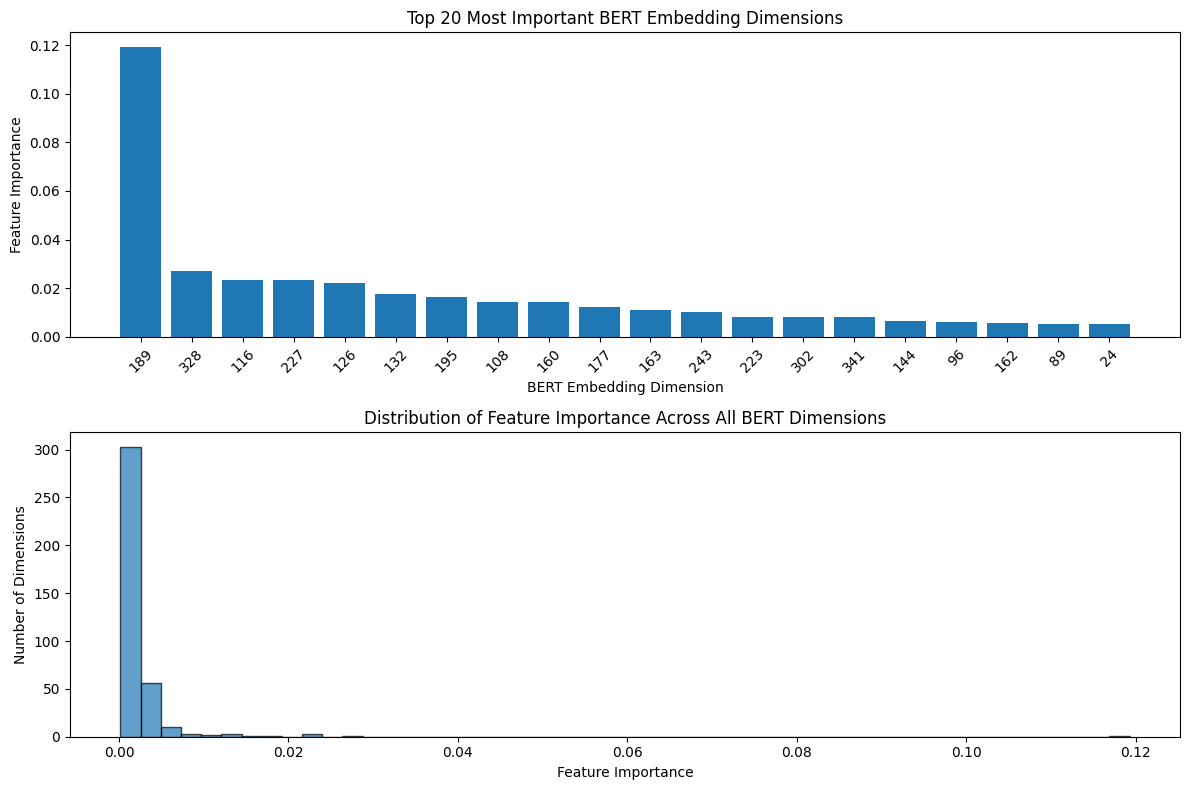


Feature Importance Statistics:
Mean importance: 0.002604
Std importance:  0.006675
Max importance:  0.119271
Min importance:  0.000175
Top 10% threshold: 0.003673

Model Training Summary:
✓ Successfully trained XGBoost model for fraud type classification
✓ Model can distinguish between 7 fraud types: ['Impersonation Scam', 'Investment Scam', 'Loan Scam', 'Lottery/Prize Scam', 'Other Scam', 'Telecom Scam', 'Class_6']
✓ Overall test accuracy: 0.9590
✓ Feature space: 384 BERT embedding dimensions
✓ Training samples: 7121, Test samples: 1781


In [22]:
# Feature Importance Analysis
print("=" * 50)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Get feature importance from XGBoost model
feature_importance = xgb_model.feature_importances_

# Since we're using BERT embeddings, features are embedding dimensions
print(f"\nTop 20 Most Important BERT Embedding Dimensions:")
print("-" * 50)

# Create feature importance dataframe
import pandas as pd
importance_df = pd.DataFrame({
    'feature_dim': range(len(feature_importance)),
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Display top 20 features
top_features = importance_df.head(20)
for idx, row in top_features.iterrows():
    print(f"Dimension {int(row['feature_dim']):3d}: {row['importance']:.6f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.bar(range(20), top_features['importance'].values)
plt.title('Top 20 Most Important BERT Embedding Dimensions')
plt.xlabel('BERT Embedding Dimension')
plt.ylabel('Feature Importance')
plt.xticks(range(20), [int(x) for x in top_features['feature_dim'].values], rotation=45)

# Plot overall feature importance distribution
plt.subplot(2, 1, 2)
plt.hist(feature_importance, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Feature Importance Across All BERT Dimensions')
plt.xlabel('Feature Importance')
plt.ylabel('Number of Dimensions')

plt.tight_layout()
plt.show()

print(f"\nFeature Importance Statistics:")
print(f"Mean importance: {np.mean(feature_importance):.6f}")
print(f"Std importance:  {np.std(feature_importance):.6f}")
print(f"Max importance:  {np.max(feature_importance):.6f}")
print(f"Min importance:  {np.min(feature_importance):.6f}")
print(f"Top 10% threshold: {np.percentile(feature_importance, 90):.6f}")

# Save the trained model and label encoder for future use
import pickle

print(f"\nModel Training Summary:")
print(f"✓ Successfully trained XGBoost model for fraud type classification")
print(f"✓ Model can distinguish between {len(le.classes_)} fraud types: {[str(x) if pd.notna(x) else f'Class_{i}' for i, x in enumerate(le.classes_)]}")
print(f"✓ Overall test accuracy: {accuracy:.4f}")
print(f"✓ Feature space: {X.shape[1]} BERT embedding dimensions")
print(f"✓ Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")